## Kelompok 9 2023A
1. Iqbal Syandana Arkan (23031554079)
2. Kevin Davindio Atha  (23031554173)
3. Kharisma Adhi Wibowo (23031554175)

## Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Sistem
import os
import warnings
from collections import Counter

# Manipulasi data dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import seaborn as sns

# Google Colab
from google.colab import files
import io

# Warnings
warnings.filterwarnings('ignore')

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

# Scikit-learn dan Imbalanced
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import joblib

## Collect Dataset & EDA

In [3]:
full_dataset = "/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/lung_cancer_dataset"
normal_path =  "/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/lung_cancer_dataset/Normal cases"
jinak_path =  "/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/lung_cancer_dataset/Bengin cases"
ganas_path =  "/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/lung_cancer_dataset/Malignant cases"

Distribusi jumlah gambar per kelas

In [4]:
print(len(os.listdir(normal_path)))
print(len(os.listdir(jinak_path)))
print(len(os.listdir(ganas_path)))

416
320
561


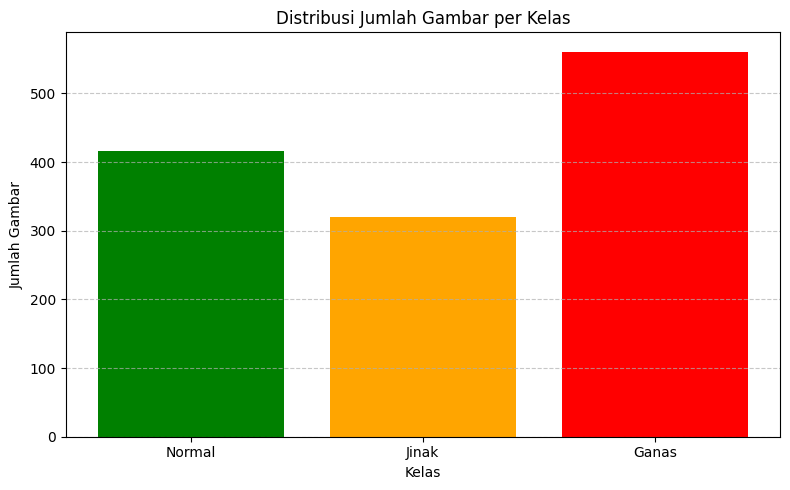

In [5]:
def hitung_gambar(folder):
    return len([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

jumlah_normal = hitung_gambar(normal_path)
jumlah_jinak = hitung_gambar(jinak_path)
jumlah_ganas = hitung_gambar(ganas_path)

# Data untuk visualisasi
labels = ['Normal', 'Jinak', 'Ganas']
jumlah = [jumlah_normal, jumlah_jinak, jumlah_ganas]

# Visualisasi
plt.figure(figsize=(8, 5))
plt.bar(labels, jumlah, color=['green', 'orange', 'red'])
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribusi gambar berdasarkan ukuran gambar

In [6]:
ukuran_gambar = []

# Telusuri semua gambar
for subdir, dirs, files in os.walk(full_dataset):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(subdir, file)
            try:
                with Image.open(img_path) as img:
                    ukuran_gambar.append(img.size)
            except Exception as e:
                print(f"Gagal membaca file {img_path}: {e}")

# Hitung jumlah kemunculan setiap ukuran
counter = Counter(ukuran_gambar)

# Tampilkan hasil
print("Jumlah gambar berdasarkan ukuran:")
for ukuran, jumlah in counter.items():
    print(f"Ukuran {ukuran}: {jumlah} gambar")


Jumlah gambar berdasarkan ukuran:
Ukuran (512, 512): 1236 gambar
Ukuran (511, 404): 1 gambar
Ukuran (801, 512): 28 gambar
Ukuran (623, 512): 31 gambar
Ukuran (506, 331): 1 gambar


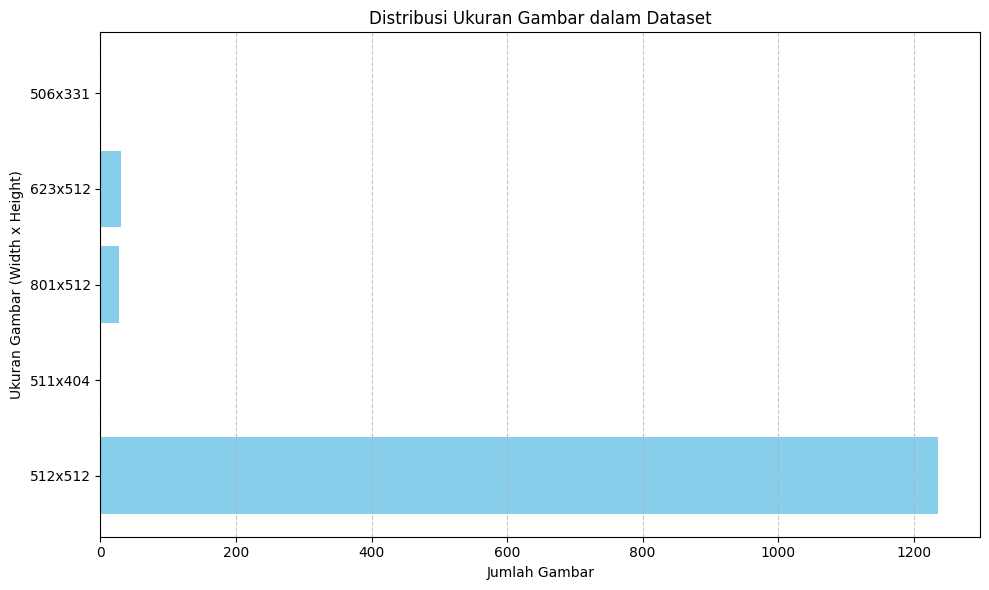

In [7]:
ukuran_str = [f"{uk[0]}x{uk[1]}" for uk in counter.keys()]
jumlah = list(counter.values())

plt.figure(figsize=(10, 6))
plt.barh(ukuran_str, jumlah, color='skyblue')
plt.xlabel("Jumlah Gambar")
plt.ylabel("Ukuran Gambar (Width x Height)")
plt.title("Distribusi Ukuran Gambar dalam Dataset")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Load Images

In [8]:
def load_images(directory):
    hasil =[Image.open(os.path.join(directory, filename)) for filename in os.listdir(directory)]
    hasil =[np.array(img) for img in hasil]
    return hasil

normal_images = load_images(normal_path)
jinak_images = load_images(jinak_path)
ganas_images =  load_images(ganas_path)

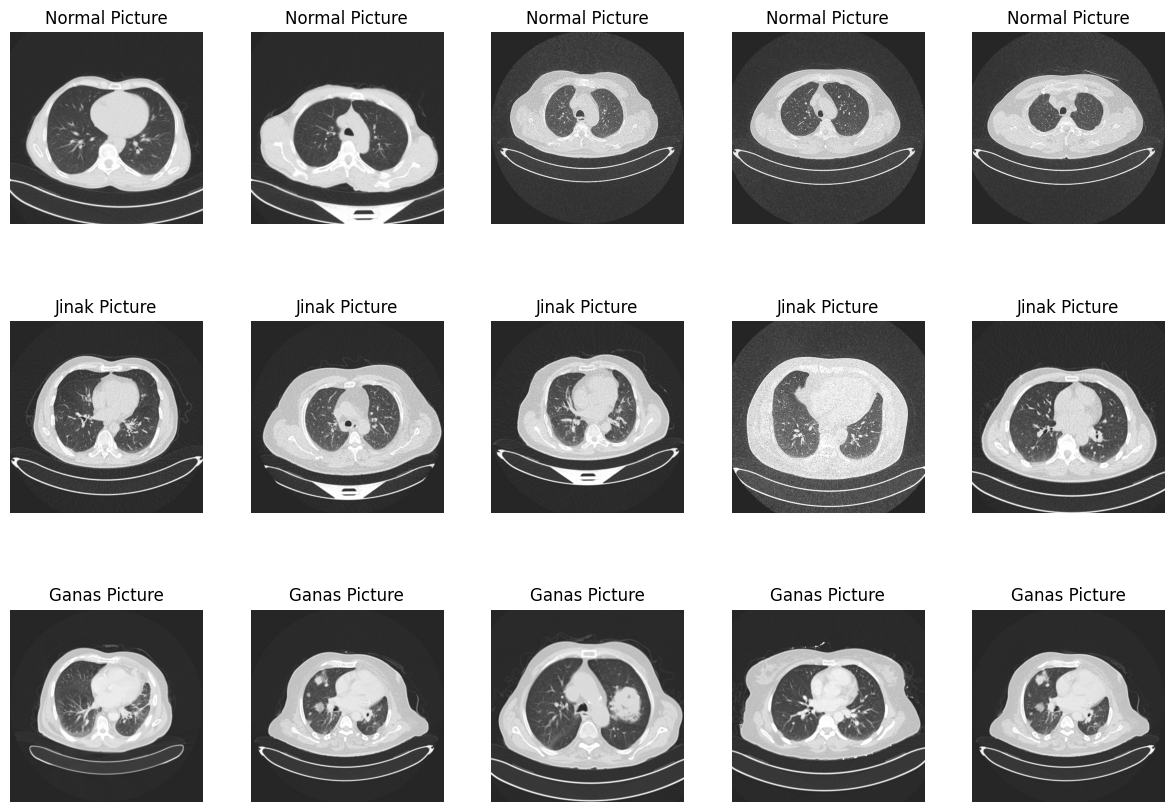

In [10]:
# Plots 2 baris, 5 kolom
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# baris pertama
for i in range(5):
    axes[0, i].imshow(normal_images[i])
    axes[0, i].set_title('Normal Picture')
    axes[0, i].axis('off')

# baris kedua
for i in range(5):
    axes[1, i].imshow(jinak_images[i])
    axes[1, i].set_title('Jinak Picture')
    axes[1, i].axis('off')

# baris ketiga
for i in range(5):
    axes[2, i].imshow(ganas_images[i])
    axes[2, i].set_title('Ganas Picture')
    axes[2, i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

## Preprocessing

### Resize Image

In [11]:
def resize_images(images):
    hasil =[cv2.resize(img,(128,128)) for img in images]
    return hasil

normal_images_resize = resize_images(normal_images)
jinak_images_resize = resize_images(jinak_images)
ganas_images_resize =  resize_images(ganas_images)

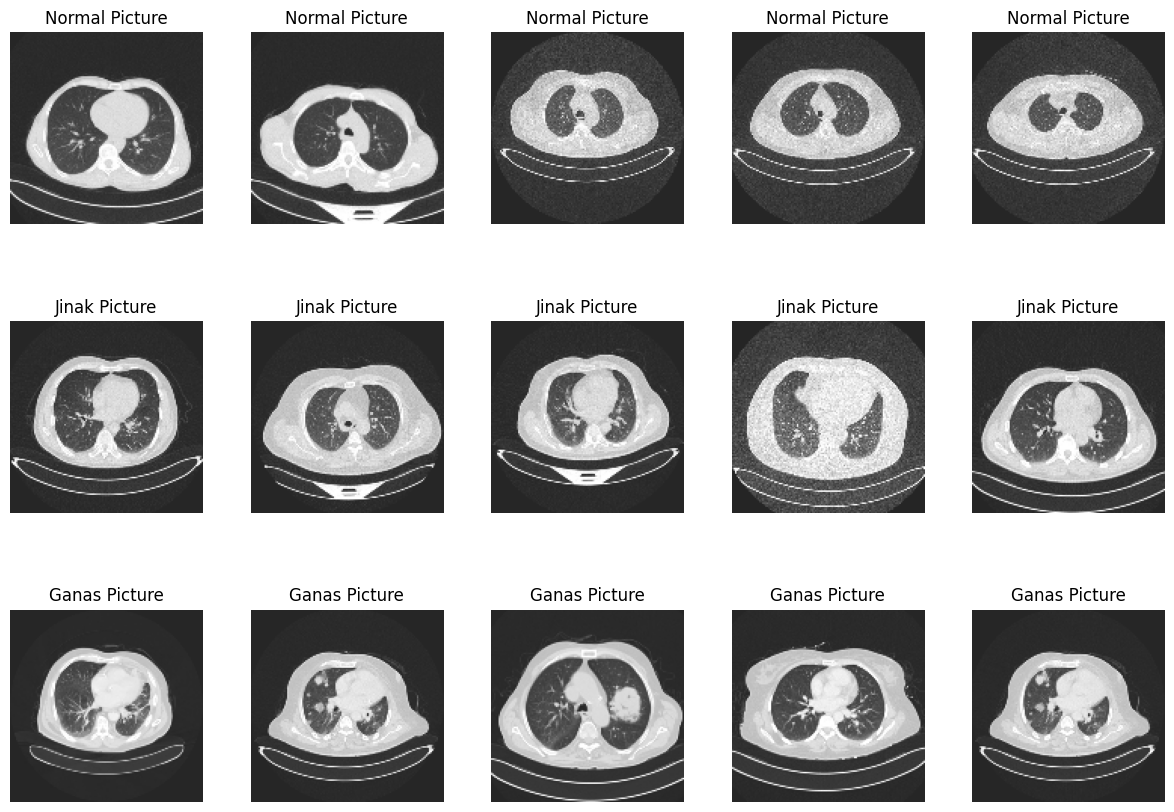

In [12]:
# Buat subplots 2 baris, 5 kolom
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

for i in range(5):
    axes[0, i].imshow(normal_images_resize[i])
    axes[0, i].set_title('Normal Picture')
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(jinak_images_resize[i])
    axes[1, i].set_title('Jinak Picture')
    axes[1, i].axis('off')

for i in range(5):
    axes[2, i].imshow(ganas_images_resize[i])
    axes[2, i].set_title('Ganas Picture')
    axes[2, i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [13]:
def get_image_sizes(images):
    sizes = [img.shape[:2] for img in images]
    return sizes

normal_sizes = get_image_sizes(normal_images_resize)
jinak_sizes = get_image_sizes(jinak_images_resize)
ganas_sizes = get_image_sizes(ganas_images_resize)
full_size = normal_sizes + jinak_sizes + ganas_sizes

In [14]:
normal_sizes[1]

(128, 128)

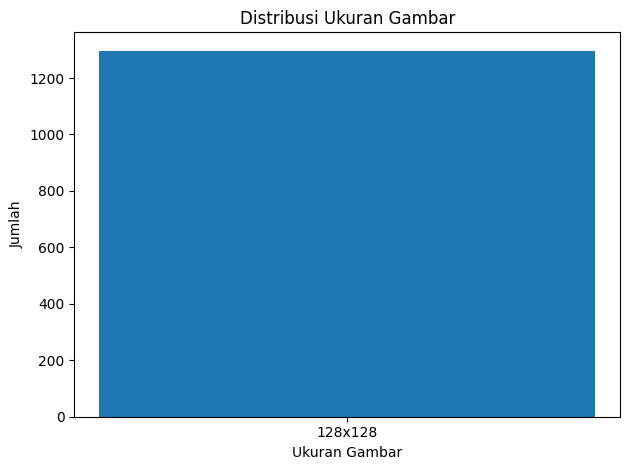

In [15]:
from collections import Counter

data_str = [f"{w}x{h}" for (w, h) in full_size]

# Hitung distribusi
counter = Counter(data_str)

# Plot bar chart
plt.bar(counter.keys(), counter.values())
plt.xlabel("Ukuran Gambar")
plt.ylabel("Jumlah")
plt.title("Distribusi Ukuran Gambar")
plt.tight_layout()
plt.show()

In [16]:
normal_images_resize[0].shape

(128, 128, 3)

### Noise Reduction

In [17]:
def apply_gaussian_filter(images, kernel_size=(5, 5), sigma=0):
    hasil = [cv2.GaussianBlur(img, kernel_size, sigma) for img in images]
    visualize_resize(images[:5],hasil[:5])
    return hasil

def visualize_resize(before,after):
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    for i in range(5):
        axes[0, i].imshow(before[i])
        axes[0, i].set_title('Sebelum')
        axes[0, i].axis('off')

    for i in range(5):
        axes[1, i].imshow(after[i])
        axes[1, i].set_title('Sesudah')
        axes[1, i].axis('off')

    plt.subplots_adjust(hspace=0.5)
    plt.show()

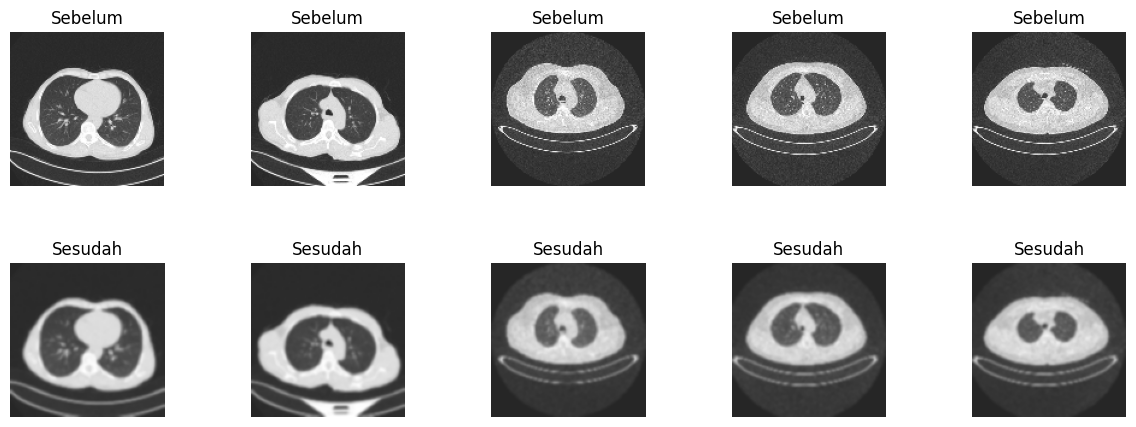

In [18]:
normal_images_filter = apply_gaussian_filter(normal_images_resize)

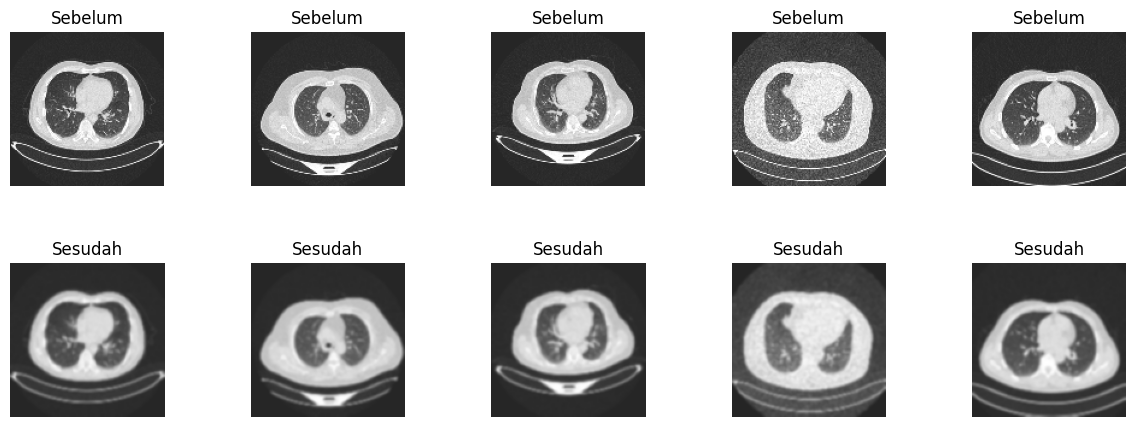

In [19]:
jinak_images_filter = apply_gaussian_filter(jinak_images_resize)

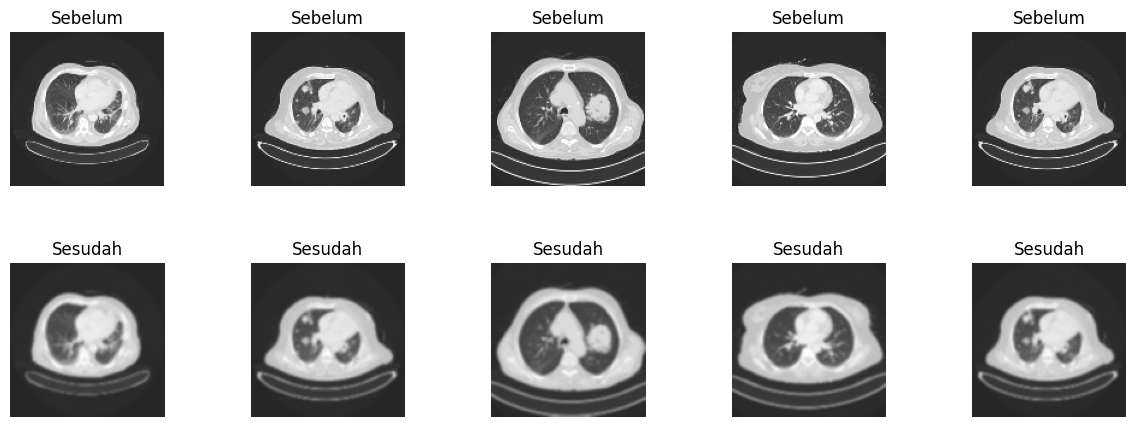

In [20]:
ganas_images_filter = apply_gaussian_filter(ganas_images_resize)

### Erosion Operation

In [21]:
def apply_erosion(images, kernel_size=(3, 3), iterations=1):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    hasil = [cv2.erode(img, kernel, iterations=iterations) for img in images]
    visualize_erosion(images[:5],hasil[:5])
    return hasil

def visualize_erosion(before,after):
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    for i in range(5):
        axes[0, i].imshow(before[i])
        axes[0, i].set_title('Sebelum')
        axes[0, i].axis('off')

    for i in range(5):
        axes[1, i].imshow(after[i])
        axes[1, i].set_title('Sesudah')
        axes[1, i].axis('off')

    plt.subplots_adjust(hspace=0.5)
    plt.show()

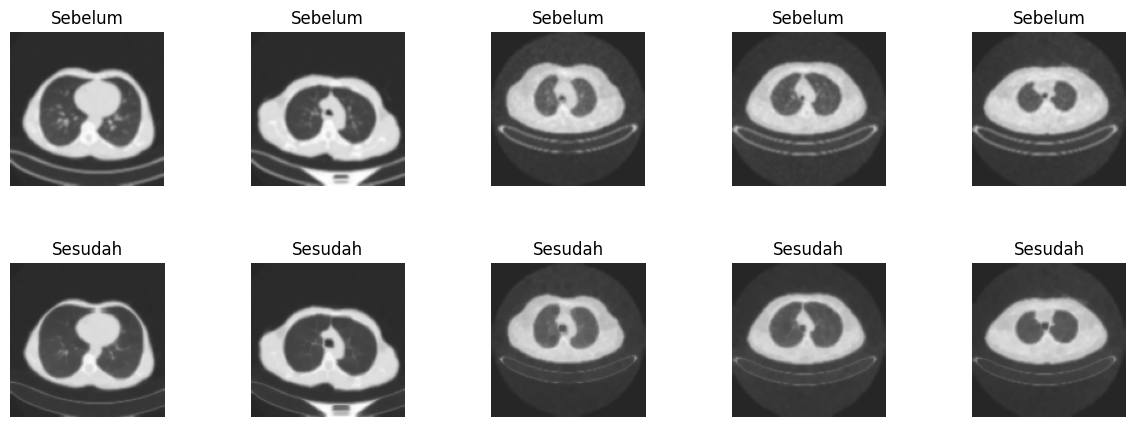

In [22]:
normal_images_erosion = apply_erosion(normal_images_filter)

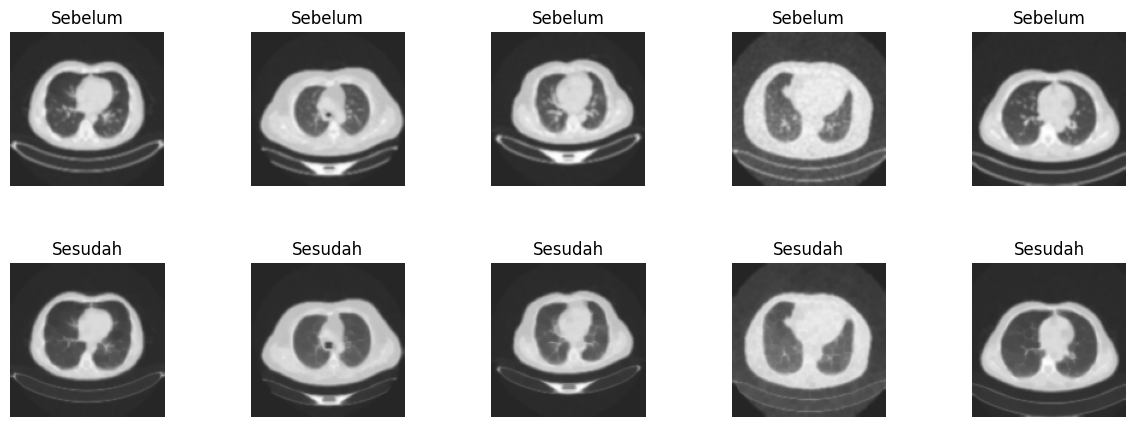

In [23]:
jinak_images_erosion = apply_erosion(jinak_images_filter)

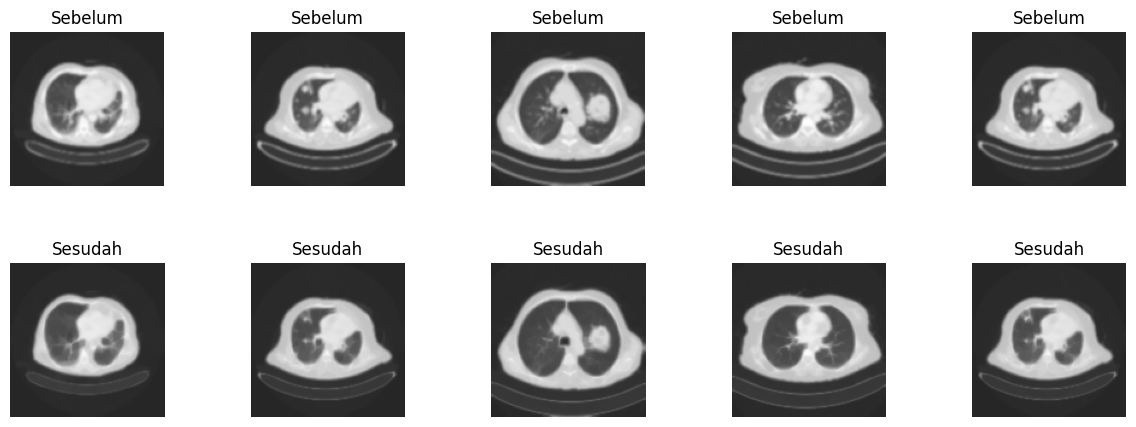

In [24]:
ganas_images_erosion = apply_erosion(ganas_images_filter)

In [25]:
ganas_images_erosion[0].shape

(128, 128, 3)

### Segmentasi stage

In [26]:
def define_lung_areas(images, threshold=100):
    hasil = []
    for img in images:
        if len(img.shape) == 2:
            gray = img
        else:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

        masked_img = cv2.bitwise_and(gray, gray, mask=mask)

        hasil.append(masked_img)

    visualize_lung_areas(images[:5], hasil[:5])
    return hasil

def visualize_lung_areas(before,after):
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    for i in range(5):
        axes[0, i].imshow(before[i],cmap='gray')
        axes[0, i].set_title('Sebelum')
        axes[0, i].axis('off')

    for i in range(5):
        axes[1, i].imshow(after[i],cmap='gray')
        axes[1, i].set_title('Sesudah')
        axes[1, i].axis('off')

    plt.subplots_adjust(hspace=0.5)
    plt.show()

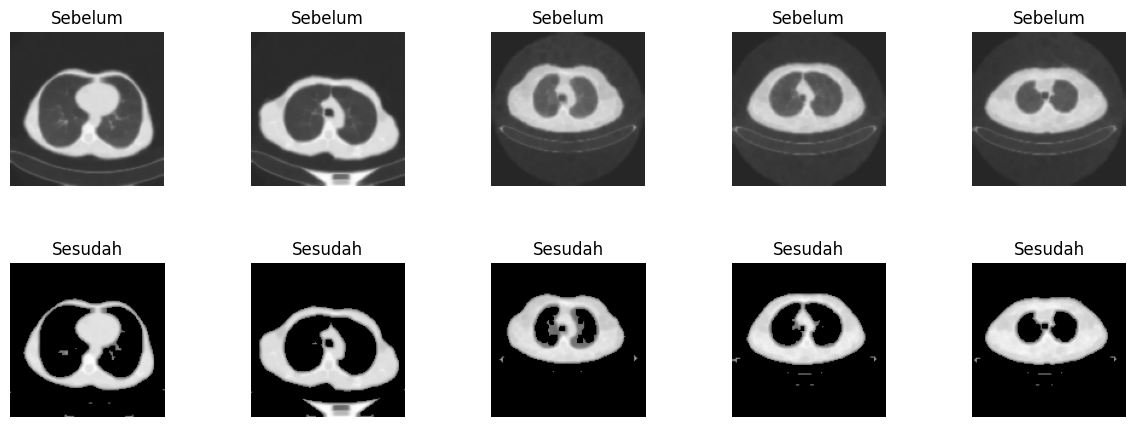

In [27]:
normal_images_lung_area = define_lung_areas(normal_images_erosion)

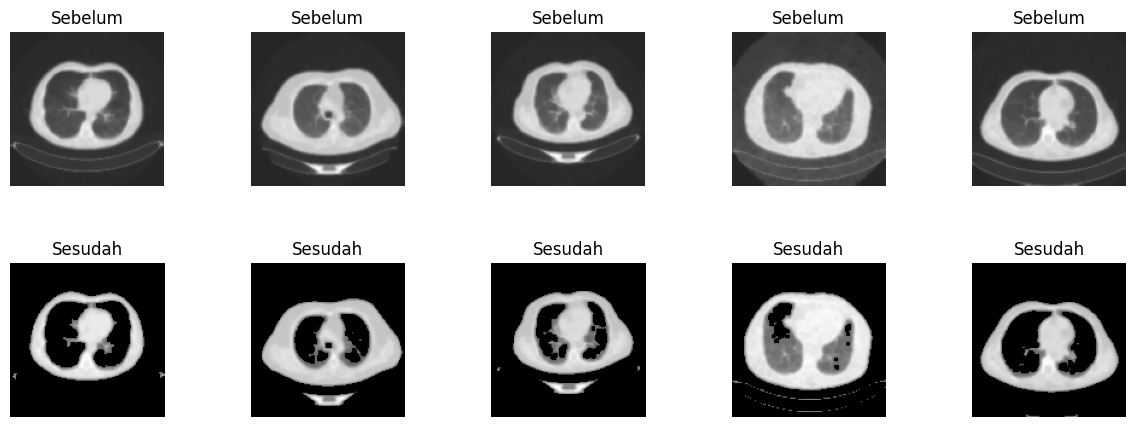

In [28]:
jinak_images_lung_area = define_lung_areas(jinak_images_erosion)

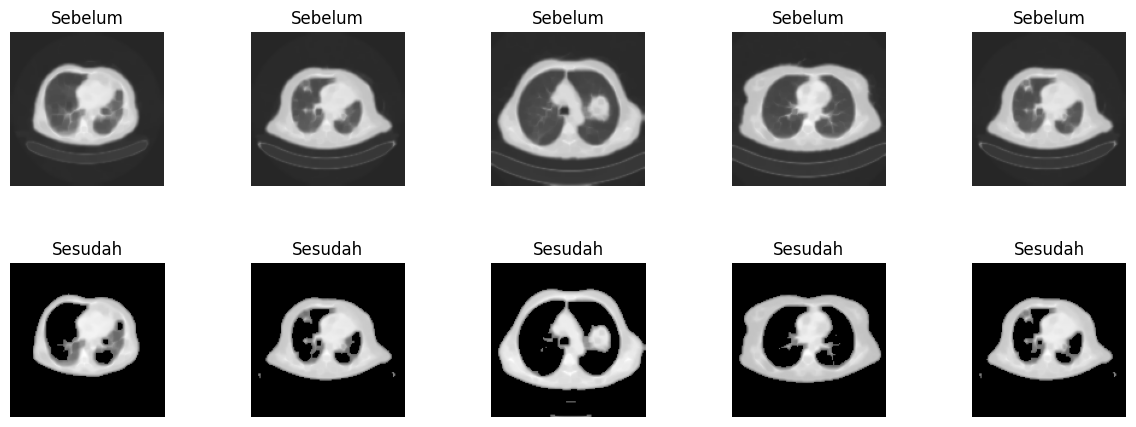

In [29]:
ganas_images_lung_area = define_lung_areas(ganas_images_erosion)

In [30]:
def apply_otsu_thresholding(images):
    hasil = []

    for img in images:
        _, segmented = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        hasil.append(segmented)

    visualize_segmentation(images[:5], hasil[:5])  # Visualisasi hasil segmentasi
    return hasil

def visualize_segmentation(before,after):
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    for i in range(5):
        axes[0, i].imshow(before[i],cmap='gray')
        axes[0, i].set_title('Sebelum')
        axes[0, i].axis('off')

    for i in range(5):
        axes[1, i].imshow(after[i],cmap='gray')
        axes[1, i].set_title('Sesudah')
        axes[1, i].axis('off')

    plt.subplots_adjust(hspace=0.5)
    plt.show()

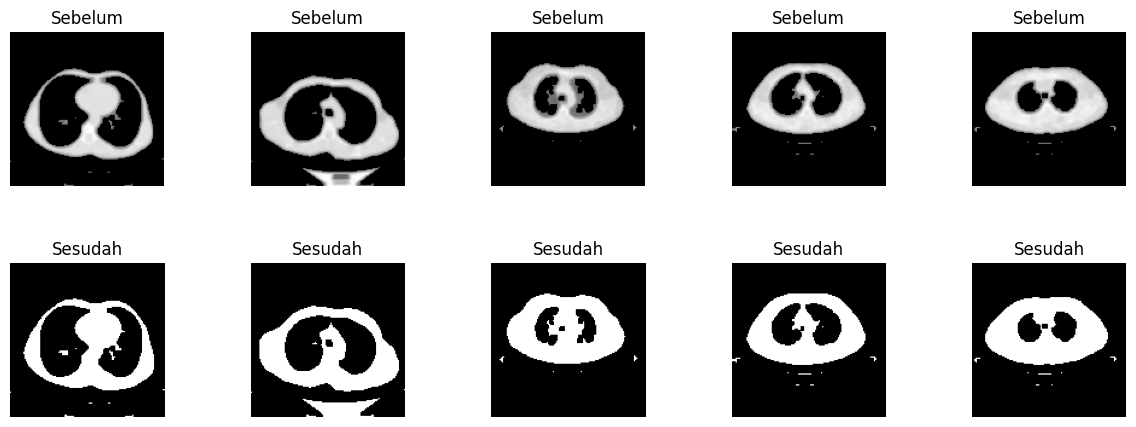

In [31]:
normal_images_segmentation = apply_otsu_thresholding(normal_images_lung_area)

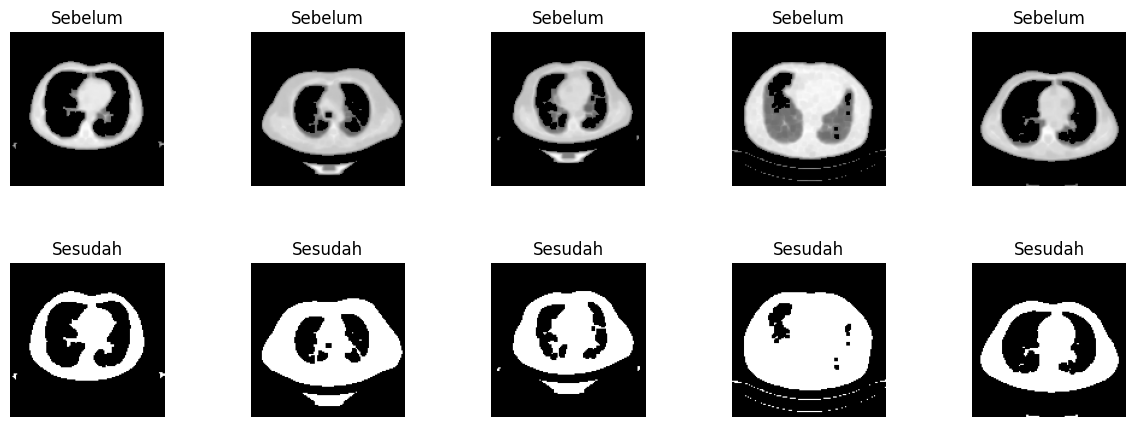

In [32]:
jinak_images_segmentation = apply_otsu_thresholding(jinak_images_lung_area)

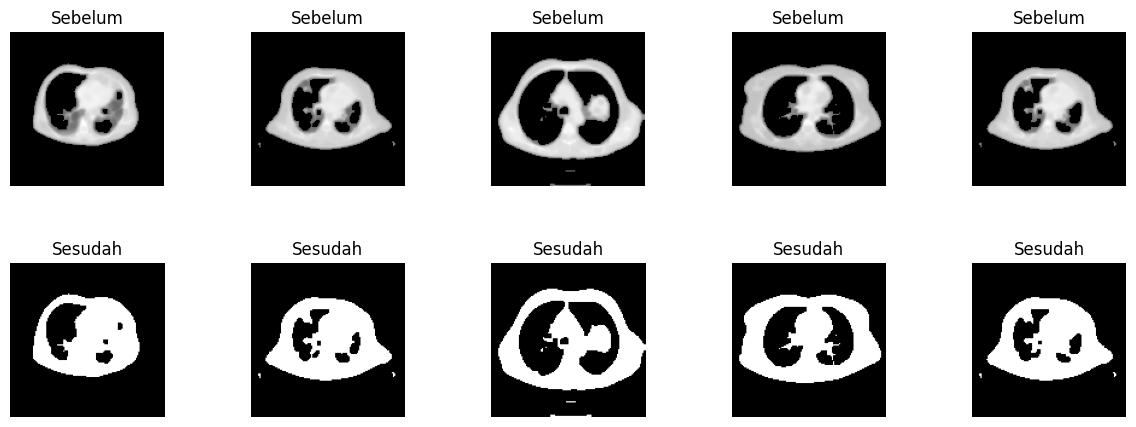

In [33]:
ganas_images_segmentation = apply_otsu_thresholding(ganas_images_lung_area)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
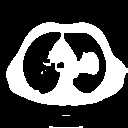

In [43]:
ganas_images_segmentation[2]

## Model

### Machine Learning

#### Features Extraction

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import gabor

def extract_glcm_gabor_features(images, distances=[1], angles=[0], levels=256,
                                glcm_props=['contrast', 'homogeneity', 'energy', 'correlation', 'ASM', 'dissimilarity'],
                                gabor_frequencies=[0.1, 0.2, 0.3], gabor_thetas=[0, np.pi/4, np.pi/2]):
    feature_list = []

    for img in images:
        # Konversi ke grayscale
        if len(img.shape) == 2:
            gray = img
        elif img.shape[2] == 1:
            gray = img[:, :, 0]
        else:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        if gray.max() >= levels:
            gray = (gray / (gray.max() + 1) * levels).astype(np.uint8)

        features = []

        # GLCM
        glcm = graycomatrix(gray,
                            distances=distances,
                            angles=angles,
                            levels=levels,
                            symmetric=True,
                            normed=True)

        for prop in glcm_props:
            try:
                val = graycoprops(glcm, prop)[0, 0]
                features.append(val.item())
            except ValueError:
                print(f"[GLCM] Properti '{prop}' gagal dihitung.")
                features.append(np.nan)

        # fitur Gabor
        gabor_amp_total = 0
        gabor_phase_sum = 0
        count = 0

        for freq in gabor_frequencies:
            for theta in gabor_thetas:
                real, imag = gabor(gray, frequency=freq, theta=theta)
                amplitude = np.sqrt(real**2 + imag**2)
                phase = np.arctan2(imag, real)

                gabor_amp_total += amplitude.mean()
                gabor_phase_sum += phase.mean()
                count += 1

        # Rata-rata amplitude dan phase
        gabor_amp_mean = float(gabor_amp_total / count)
        gabor_phase_mean = float(gabor_phase_sum / count)

        features.extend([gabor_amp_mean, gabor_phase_mean])

        feature_list.append(features)

    return feature_list


In [ ]:
normal_images_ekstraction = extract_glcm_gabor_features(normal_images_segmentation)
jinak_images_ekstraction = extract_glcm_gabor_features(jinak_images_segmentation)
ganas_images_ekstraction = extract_glcm_gabor_features(ganas_images_segmentation)

In [ ]:
normal_images_ekstraction[0]

[1768.02718996063,
 0.9728104575099095,
 0.797585372138497,
 0.9194149259331726,
 0.6361424258493048,
 6.933439960629921,
 2.248046875,
 0.323486328125]

#### Labeling

In [ ]:
def assign_labels(normal_images, jinak_images, ganas_images):
    normal_labels = np.zeros(len(normal_images))
    jinak_labels = np.ones(len(jinak_images))
    ganas_labels = np.full(len(ganas_images), 2)
    return normal_labels, jinak_labels, ganas_labels

normal_labels, jinak_labels, ganas_labels = assign_labels(normal_images_ekstraction, jinak_images_ekstraction, ganas_images_ekstraction)

In [ ]:
normal_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
jinak_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
ganas_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
data_full_images = normal_images_ekstraction + jinak_images_ekstraction + ganas_images_ekstraction
labels = np.concatenate([normal_labels, jinak_labels, ganas_labels], axis=0)

In [ ]:
data_full_images[:5]

[[1768.02718996063,
  0.9728104575099095,
  0.797585372138497,
  0.9194149259331726,
  0.6361424258493048,
  6.933439960629921,
  2.248046875,
  0.323486328125],
 [1568.0241141732283,
  0.9758861976105985,
  0.7646710054604731,
  0.9384442994185183,
  0.5847217465919308,
  6.149114173228346,
  2.291015625,
  0.326904296875],
 [1184.0182086614172,
  0.9817916186039212,
  0.7963409152358331,
  0.9476708530483039,
  0.6341588532786442,
  4.643208661417322,
  1.7333984375,
  0.244140625],
 [1176.0180856299212,
  0.9819146482079487,
  0.81175708404953,
  0.9440578928443006,
  0.6589495635045957,
  4.611835629921259,
  1.7626953125,
  0.2568359375],
 [992.0152559055118,
  0.9847443291005826,
  0.7951734891726495,
  0.9567424285343948,
  0.6323008778830058,
  3.890255905511811,
  1.611328125,
  0.24072265625]]

In [ ]:
len(data_full_images)

1297

In [ ]:
len(labels)

1297

#### Split Data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ubah data dan label menjadi array
X = np.array(data_full_images)
y = np.array(labels)

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[1.25601932e+03, 9.80684352e-01, 7.81321273e-01, ...,
        4.92556594e+00, 1.81054688e+00, 2.54150391e-01],
       [1.11201710e+03, 9.82898885e-01, 7.21637284e-01, ...,
        4.36085138e+00, 1.90820312e+00, 2.67333984e-01],
       [1.82802811e+03, 9.71887735e-01, 7.67351291e-01, ...,
        7.16873770e+00, 2.45703125e+00, 3.34960938e-01],
       ...,
       [1.16001784e+03, 9.82160707e-01, 7.74229272e-01, ...,
        4.54908957e+00, 1.83496094e+00, 2.52929688e-01],
       [2.47603808e+03, 9.61922338e-01, 6.99351676e-01, ...,
        9.70995325e+00, 2.83007812e+00, 4.02099609e-01],
       [1.10801704e+03, 9.82960400e-01, 7.04904975e-01, ...,
        4.34516486e+00, 1.95117188e+00, 2.76855469e-01]])

In [ ]:
y_train

array([0., 2., 2., ..., 2., 2., 2.])

#### Handling Imbalace Data

In [ ]:
data_imbalance = pd.DataFrame(X_train, columns=[f'Fitur_{i+1}' for i in range(X_train.shape[1])])
data_imbalance['Label'] = y_train

data_imbalance.head()

Fitur_1   Fitur_2   Fitur_3   Fitur_4   Fitur_5   Fitur_6   Fitur_7  \
0  1256.019316  0.980684  0.781321  0.947878  0.610463  4.925566  1.810547   
1  1112.017101  0.982899  0.721637  0.963019  0.520760  4.360851  1.908203   
2  1828.028113  0.971888  0.767351  0.926761  0.588828  7.168738  2.457031   
3  1208.018578  0.981423  0.805135  0.944299  0.648242  4.737328  1.654297   
4  1216.018701  0.981300  0.737468  0.957284  0.543859  4.768701  2.134766   

    Fitur_8  Label  
0  0.254150    0.0  
1  0.267334    2.0  
2  0.334961    2.0  
3  0.238770    1.0  
4  0.300781    0.0

In [ ]:
data_imbalance['Label'].value_counts()

Label
2.0    450
0.0    333
1.0    254
Name: count, dtype: int64

In [ ]:
X = data_imbalance[['Fitur_1', 'Fitur_2','Fitur_3', 'Fitur_4','Fitur_5', 'Fitur_6','Fitur_7','Fitur_8']]
y = data_imbalance['Label']

# Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

Label
0.0    450
2.0    450
1.0    450
Name: count, dtype: int64

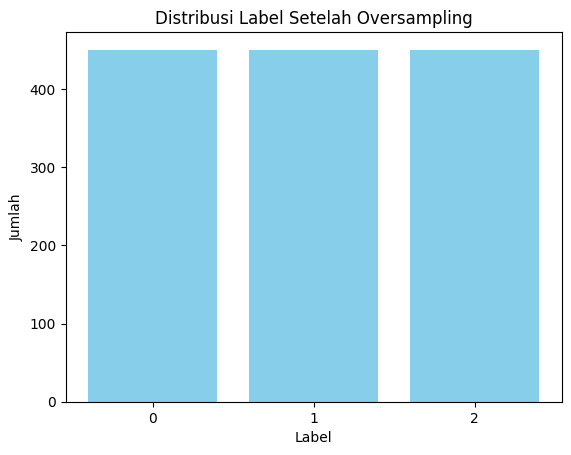

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(y_resampled)

plt.bar(counter.keys(), counter.values(), color='skyblue')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label Setelah Oversampling')
plt.xticks(list(counter.keys()))
plt.show()


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Parameter awal
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Hyperparameter tuning Gridsearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(
    rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1
)
grid_search.fit(X_resampled, y_resampled)

# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluasi
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest (GLCM): {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Akurasi Random Forest (GLCM): 0.81

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        83
         1.0       0.81      0.71      0.76        66
         2.0       0.85      0.86      0.86       111

    accuracy                           0.81       260
   macro avg       0.80      0.79      0.80       260
weighted avg       0.81      0.81      0.81       260

Confusion Matrix:
[[67  7  9]
 [11 47  8]
 [11  4 96]]


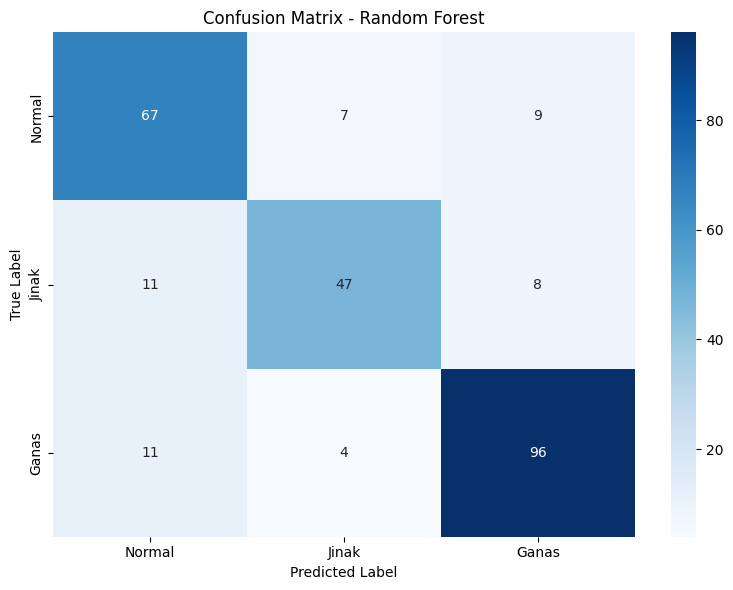

In [ ]:
plt.figure(figsize=(8,6))
class_labels = ['Normal', 'Jinak', 'Ganas']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Save Model Random Forest

In [ ]:
import joblib

save_path = '/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/random_forest_model_baru.pkl'

# Simpan model terbaik Random Forest
joblib.dump(best_model, save_path)
print(f"Model disimpan di: {save_path}")

Model disimpan di: /content/drive/MyDrive/projek_semester_4/PMD/projek UAS/random_forest_model_baru.pkl


### Deep Learning

#### labeling

In [ ]:
def assign_labels(normal_images, jinak_images, ganas_images):
    normal_labels = np.zeros(len(normal_images))
    jinak_labels = np.ones(len(jinak_images))
    ganas_labels = np.full(len(ganas_images), 2)
    return normal_labels, jinak_labels, ganas_labels

normal_labels, jinak_labels, ganas_labels = assign_labels(normal_images_segmentation, jinak_images_segmentation, ganas_images_segmentation)

In [ ]:
normal_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
jinak_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
ganas_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
data_full_images = normal_images_segmentation + jinak_images_segmentation + ganas_images_segmentation
labels = np.concatenate([normal_labels, jinak_labels, ganas_labels], axis=0)

In [ ]:
data_full_images[:5]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [ ]:
len(data_full_images)

1297

In [ ]:
len(labels)

1297

#### Splitting data

In [ ]:
X = np.array(data_full_images)
y = np.array(labels)

#### CNN

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Stratified K-Fold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Path penyimpanan model terbaik
save_path = '/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/model_cnn_baru.keras'

# Variabel untuk menyimpan akurasi terbaik
best_accuracy = 0.0

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1), padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

fold = 1
acc_per_fold = []

for train_index, val_index in kf.split(X, y):
    print(f"\n🔁 Fold {fold}")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = create_model()

    # Simpan model sementara
    temp_model_path = f'/content/model_fold_{fold}.keras'
    checkpoint = ModelCheckpoint(
        temp_model_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        verbose=1,
        callbacks=[checkpoint]
    )

    # Load model terbaik
    model.load_weights(temp_model_path)
    score = model.evaluate(X_val, y_val, verbose=0)
    acc = score[1]
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    acc_per_fold.append(acc)

    # Simpan model jika lebih baik dari sebelumnya
    if acc > best_accuracy:
        best_accuracy = acc
        model.save(save_path)
        print(f"Model terbaik disimpan ke: {save_path}")

    fold += 1

print(f"\nAkurasi rata-rata dari {k} fold: {np.mean(acc_per_fold):.4f}")
print(f"Model terbaik memiliki akurasi: {best_accuracy:.4f}")


🔁 Fold 1
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.4461 - loss: 890.5781
Epoch 1: val_accuracy improved from -inf to 0.76154, saving model to /content/model_fold_1.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4494 - loss: 878.5817 - val_accuracy: 0.7615 - val_loss: 14.8322
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.7571 - loss: 16.6615
Epoch 2: val_accuracy improved from 0.76154 to 0.86923, saving model to /content/model_fold_1.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.7581 - loss: 16.4059 - val_accuracy: 0.8692 - val_loss: 0.6302
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.8096 - loss: 0.6544
Epoch 3: val_accuracy improved from 0.86923 to 0.88846, saving model to /content/model_fold_1.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8096 - loss: 0.6541 - val_accuracy: 0.8885 - val_loss: 0.3546
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.8500 - loss: 0.62

Save Model

## Testing

In [ ]:
# Load model random forest
model_rf = joblib.load('/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/random_forest_model_baru.pkl')

In [ ]:
# Load model CNN
model_cnn = load_model('/content/drive/MyDrive/projek_semester_4/PMD/projek UAS/model_cnn_baru.keras')

In [ ]:
def preprocessing_image(image_array, resize_dim=(128, 128), blur_kernel=(5, 5), blur_sigma=0, erosion_kernel=(3, 3), erosion_iterations=1, lung_threshold=100):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, erosion_kernel)

    # Resize
    resized = cv2.resize(image_array, resize_dim)

    # Gaussian Blur
    blurred = cv2.GaussianBlur(resized, blur_kernel, blur_sigma)

    # Erosion
    eroded = cv2.erode(blurred, kernel, iterations=erosion_iterations)

    # ubah ke grayscale
    gray = eroded if len(eroded.shape) == 2 else cv2.cvtColor(eroded, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, mask = cv2.threshold(gray, lung_threshold, 255, cv2.THRESH_BINARY)
    masked_img = cv2.bitwise_and(gray, gray, mask=mask)

    return masked_img

Saving Normal case (5).jpg to Normal case (5).jpg


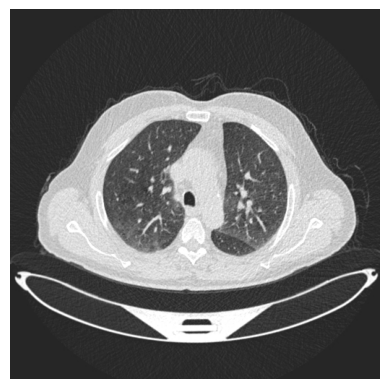

0.0
Normal


In [ ]:
def predict_image_rf(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img_array = np.array(img)
    preprocessed_img = preprocessing_image(img_array)

    # GLCM
    features = extract_glcm_gabor_features([preprocessed_img])

    features_array = np.array(features)
    prediction_label_index = model_rf.predict(features_array)[0]
    print(prediction_label_index)

    # Prediksi Kelas
    if prediction_label_index == 0:
        return "Normal"
    elif prediction_label_index == 1:
        return "Jinak"
    else:
        return "Ganas"

# Upload files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image_rf(image_bytes)
print(result)

Saving Normal case (29).jpg to Normal case (29).jpg


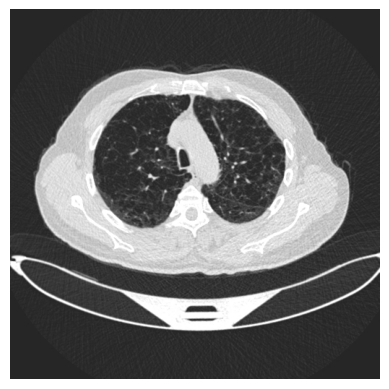

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction probabilities: [[0.33724904 0.33663324 0.32611772]]
Predicted label index: 0
Normal


In [ ]:
def predict_image_cnn(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img_array = np.array(img)
    preprocessed_img = preprocessing_image(img_array)

    # channel dimension.
    preprocessed_img_cnn_input = np.expand_dims(preprocessed_img, axis=0)
    preprocessed_img_cnn_input = np.expand_dims(preprocessed_img_cnn_input, axis=-1)

    preprocessed_img_cnn_input = preprocessed_img_cnn_input.astype(np.float32) / 255.0

    # Make prediction using the CNN model
    predictions = model_cnn.predict(preprocessed_img_cnn_input)

    # Get the class index with the highest probability
    prediction_label_index = np.argmax(predictions, axis=1)[0]
    print(f"Prediction probabilities: {predictions}")
    print(f"Predicted label index: {prediction_label_index}")

    # Prediksi Kelas
    if prediction_label_index == 0:
        return "Normal"
    elif prediction_label_index == 1:
        return "Jinak"
    elif prediction_label_index == 2:
        return "Ganas"
    else:
        return "Unknown"

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image_cnn(image_bytes)
print(result)